In [1]:
from module.cleverhans_model import AttackModel
from module.utils import *
%matplotlib inline

Using TensorFlow backend.


In [2]:
batch_shape = (110, 224, 224, 3)
M=AttackModel(batch_shape, 110)
M.load(name='vgg_16')

INFO:tensorflow:Restoring parameters from ../official_data/model/vgg_16/vgg_16.ckpt


In [5]:
datag = dev_data_generater(batch_shape=batch_shape, label_shape=(110,110))
_,X,Y = next(datag)
X = M.preprocess_input(X)
p=Profile(M.name+' predict')
ypred, accuracy = M.predict(X,Y)
p.stop()
print(accuracy)

inception predict runs: 147.94 s
0.77272725


In [4]:
from cleverhans.attacks import FastGradientMethod
attack_params = {"eps":32.0 / 255.0, "clip_min": -1.0, "clip_max": 1.0}
datag = dev_data_generater(batch_shape=batch_shape, label_shape=(110,110))
_,X,Y = next(datag)
X = M.preprocess_input(X)
p=Profile('inception attack')
Xadv, ypred, accuracy = M.attack(X,Y, FastGradientMethod,attack_params)
p.stop()
print(accuracy)

inception attack runs: 42.87 s
0.06363636


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


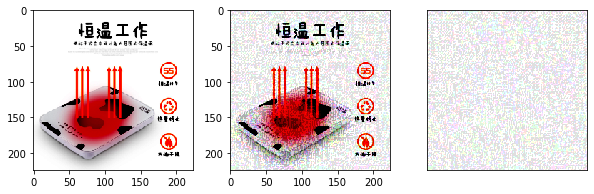

In [9]:
plot_images(X[5], Xadv[5])

In [6]:
calc_l2(X[0], Xadv[0])

39.29634692836718

In [21]:
calc_l2(X, Xadv)*255/110 

1116.255842868901

In [19]:
def plot_images(X, Xadv):
    n=5
    plt.figure(figsize=(10,10))
    for i in range(n):
        plt.subplot(n,3, i*3+1)
        fig=plt.imshow(X[i])
        plt.subplot(n,3, i*3 + 2)
        fig=plt.imshow(Xadv[i])
        plt.subplot(n,3, i*3 + 3)
        fig=plt.imshow(1 + Xadv[i]-X[i])
        fig.axes.get_xaxis().set_visible(False)
        fig.axes.get_yaxis().set_visible(False)
    plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

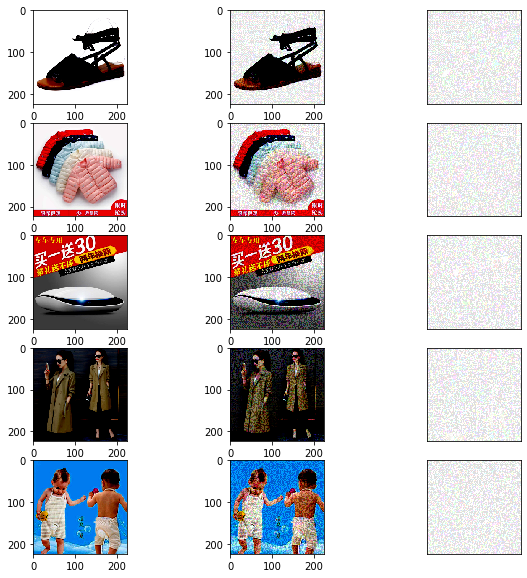

In [20]:
plot_images(X, Xadv)

In [26]:
im = (X[0]+1)*255
attack_im= (Xadv[0]+1)*255
diff = im.reshape((-1, 3)) - attack_im.reshape((-1, 3))
distance = np.mean(np.sqrt(np.sum((diff ** 2), axis=1)))

In [27]:
distance

38.799944875466586

In [29]:
im.reshape((-1, 3)).shape

(50176, 3)

In [30]:
calc_l2(im.reshape((-1, 3)), attack_im.reshape((-1, 3)))

10020.568736350699

In [33]:
np.sqrt(np.sum((diff ** 2), axis=1)).shape

(50176,)

In [4]:
M._model._model

{'arg_scope': <function tensorflow.contrib.slim.python.slim.nets.vgg.vgg_arg_scope(weight_decay=0.0005)>,
 'graph': <function tensorflow.contrib.slim.python.slim.nets.vgg.vgg_16(inputs, num_classes=1000, is_training=True, dropout_keep_prob=0.5, spatial_squeeze=True, scope='vgg_16')>,
 'checkpoint_dir': '../official_data/model/vgg_16/vgg_16.ckpt',
 'preprocess': <function module.official_model_v2.OfficialModel.<lambda>(x)>}

In [5]:
M.op_endpoints

AttributeError: 'AttackModel' object has no attribute 'op_endpoints'

In [1]:
from tensorflow.contrib import slim
from tensorflow.contrib.slim.python.slim.nets import inception_v1, resnet_v1, vgg


In [7]:
with slim.arg_scope(vgg.vgg_arg_scope()):
    outputs, end_points = vgg.vgg_16(M.x)

In [8]:
end_points

OrderedDict([('vgg_16/conv1/conv1_1',
              <tf.Tensor 'vgg_16/conv1/conv1_1/Relu:0' shape=(110, 224, 224, 64) dtype=float32>),
             ('vgg_16/conv1/conv1_2',
              <tf.Tensor 'vgg_16/conv1/conv1_2/Relu:0' shape=(110, 224, 224, 64) dtype=float32>),
             ('vgg_16/pool1',
              <tf.Tensor 'vgg_16/pool1/MaxPool:0' shape=(110, 112, 112, 64) dtype=float32>),
             ('vgg_16/conv2/conv2_1',
              <tf.Tensor 'vgg_16/conv2/conv2_1/Relu:0' shape=(110, 112, 112, 128) dtype=float32>),
             ('vgg_16/conv2/conv2_2',
              <tf.Tensor 'vgg_16/conv2/conv2_2/Relu:0' shape=(110, 112, 112, 128) dtype=float32>),
             ('vgg_16/pool2',
              <tf.Tensor 'vgg_16/pool2/MaxPool:0' shape=(110, 56, 56, 128) dtype=float32>),
             ('vgg_16/conv3/conv3_1',
              <tf.Tensor 'vgg_16/conv3/conv3_1/Relu:0' shape=(110, 56, 56, 256) dtype=float32>),
             ('vgg_16/conv3/conv3_2',
              <tf.Tensor 'vgg_16/con

In [3]:
import  tensorflow as tf
datag = dev_data_generater(batch_shape=batch_shape, label_shape=(110,110))
_,X,Y = next(datag)

_R_MEAN = 123.68
_G_MEAN = 116.78
_B_MEAN = 103.94
means= [_R_MEAN, _G_MEAN, _B_MEAN]
channels = tf.split(axis=3, num_or_size_splits=3, value=X)
for i in range(3):
    channels[i] -= means[i]
XX = tf.concat(axis=3, values=channels)



In [8]:
with tf.Session() as sess:
    XX = sess.run(XX)
XX.shape

(110, 224, 224, 3)

In [9]:
p=Profile(M.name+' predict')
ypred, accuracy = M.predict(XX,Y)
p.stop()
print(accuracy)

vgg_16 predict runs: 74.01 s
0.9909091
